In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r"Customer Churn.csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blank with 0 as tenure is 0 and dtypes hanged from object to float

In [8]:
data["TotalCharges"]=data["TotalCharges"].replace(" ","0")
data["TotalCharges"]=data["TotalCharges"].astype("float")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
data.duplicated().sum()

np.int64(0)

In [16]:
data["customerID"].duplicated().sum()

np.int64(0)

In [17]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"


data["SeniorCitizen"]=data["SeniorCitizen"].apply(conv)

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer ID
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


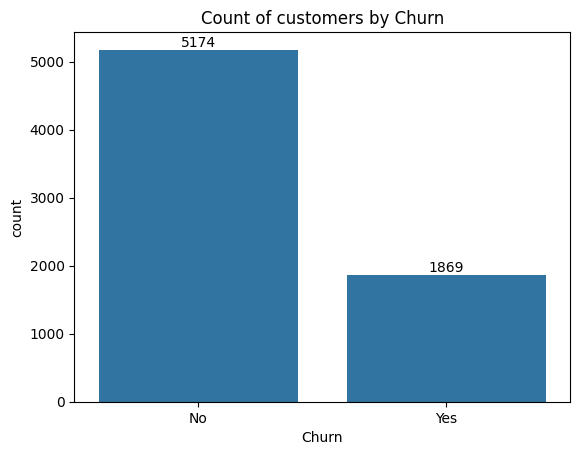

In [30]:
ax=sns.countplot(x=data['Churn'])
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

In [25]:
gb=data.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


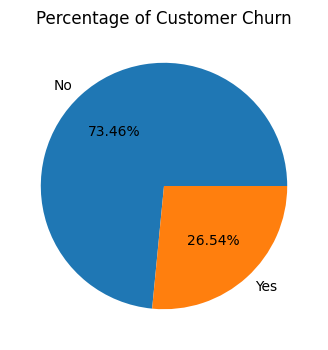

In [32]:
plt.figure(figsize=(4,4))
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Customer Churn")
plt.show()

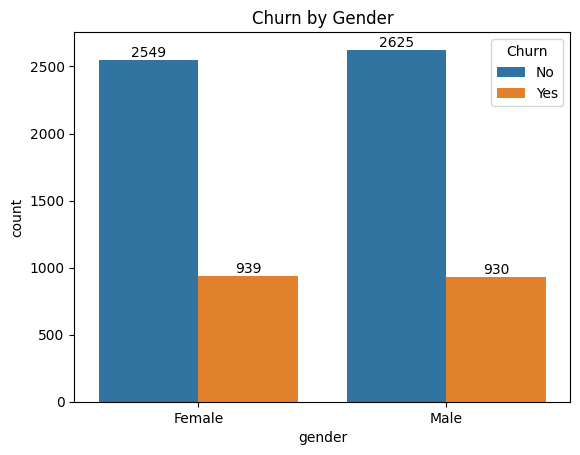

In [42]:
ay=sns.countplot(x=data['gender'],data=data,hue='Churn')
ay.bar_label(ay.containers[0])
ay.bar_label(ay.containers[1])
plt.title("Churn by Gender")
plt.show()

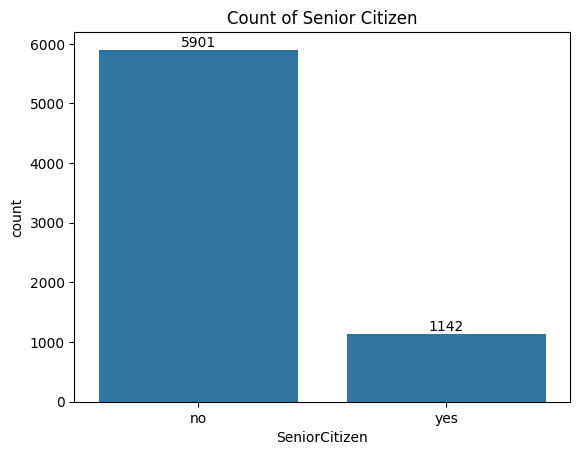

In [49]:
ab=sns.countplot(x=data['SeniorCitizen'],data=data)
ab.bar_label(ab.containers[0])
plt.title("Count of Senior Citizen")
plt.show()

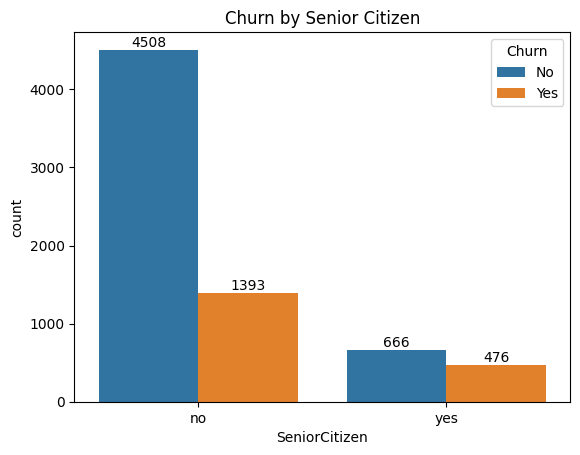

In [43]:
az=sns.countplot(x=data['SeniorCitizen'],data=data,hue='Churn')
az.bar_label(az.containers[0])
az.bar_label(az.containers[1])
plt.title("Churn by Senior Citizen")
plt.show()

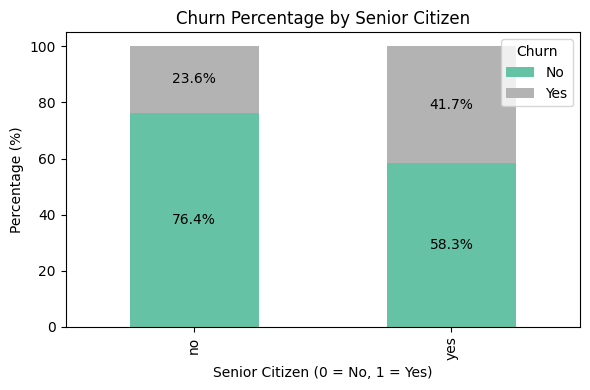

In [44]:
ct = pd.crosstab(data['SeniorCitizen'], data['Churn'])

# Step 2: Convert to percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Step 3: Plot
ax = ct_percent.plot(kind='bar', stacked=True, colormap='Set2', figsize=(6,4))

# Step 4: Add percentage labels
for i, row in enumerate(ct_percent.values):
    bottom = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, bottom + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=10)
            bottom += val

# Formatting
plt.title('Churn Percentage by Senior Citizen')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage (%)')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


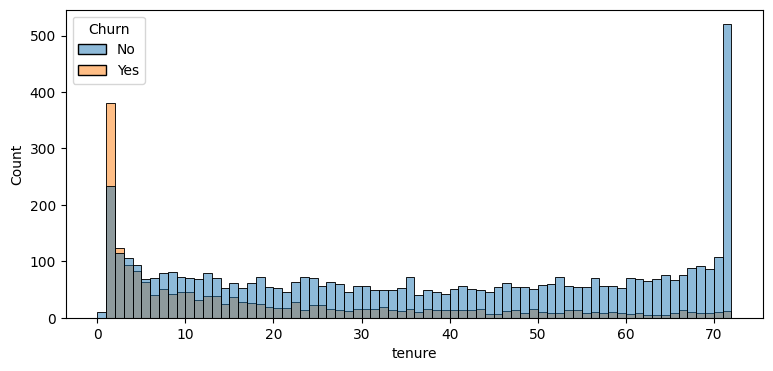

In [57]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=data,bins=72,hue='Churn')
plt.show()

# people who have used have your services for long time has stay and people who used your services for 1 or 2 month haved churned

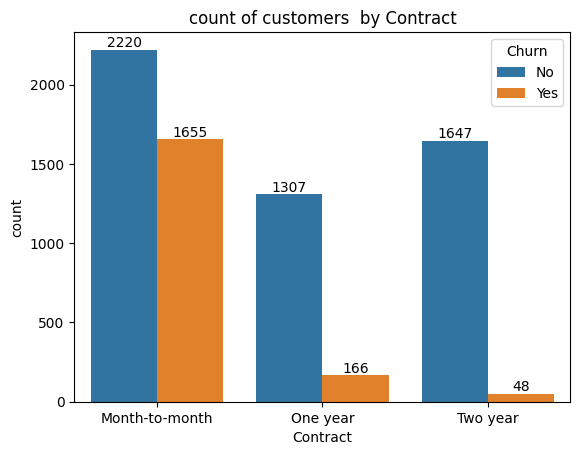

In [62]:
ay=sns.countplot(x=data['Contract'],data=data,hue='Churn')
ay.bar_label(ay.containers[0])
ay.bar_label(ay.containers[1])
plt.title("count of customers  by Contract")
plt.show()

# people who have 2  month contract are likely to churn then from those who have 1 or 2 yer of contract 

In [63]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'customer ID'], dtype=object)

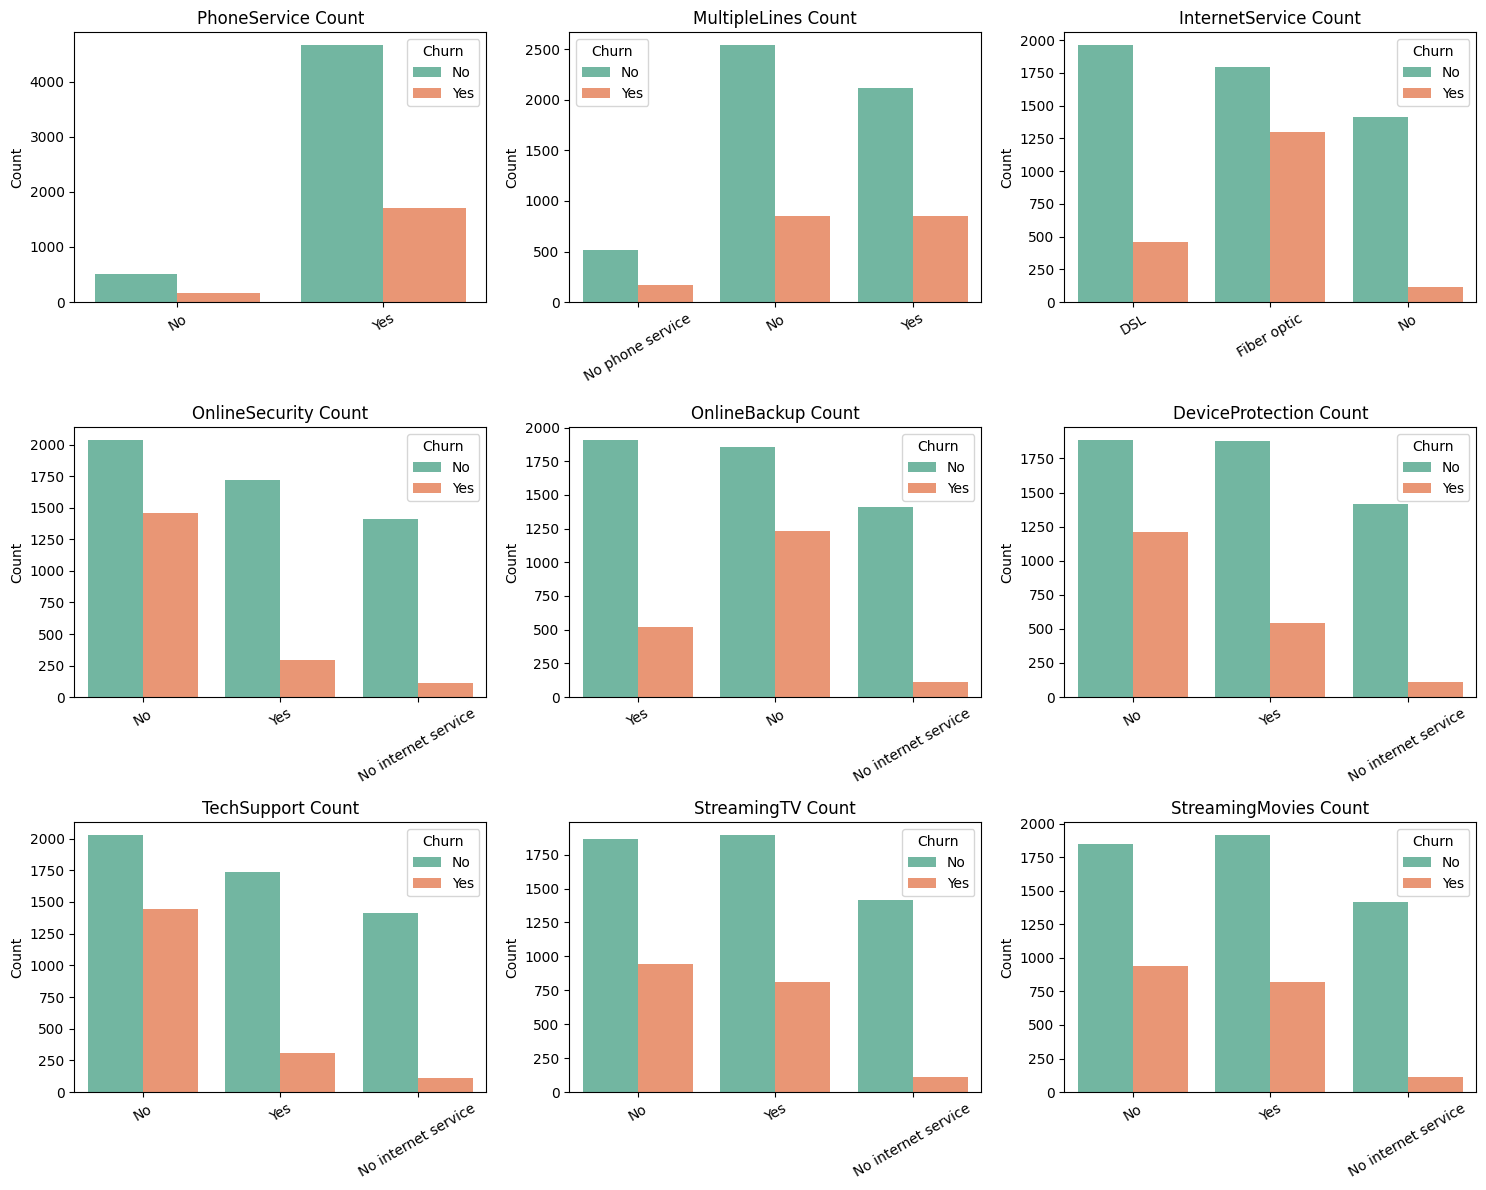

In [66]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots (3 rows x 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to 1D list for easy iteration

for i, col in enumerate(cols):
    sns.countplot(x=col, data=data, ax=axes[i], palette='Set2',hue='Churn')
    axes[i].set_title(f'{col} Count')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

#Customers who do not have services like OnlineSecurity, TechSupport, and DeviceProtection are more likely to churn.
Churn is higher among fiber optic users compared to DSL or no internet service.
People without streaming services (TV or Movies) and OnlineBackup also tend to churn more.
In general, lack of additional services is linked to higher churn rates, suggesting these features help retain customers.


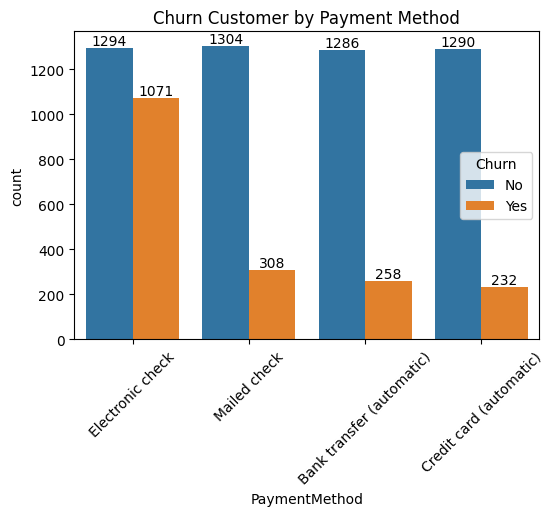

In [70]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=data,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title("Churn Customer by Payment Method")
plt.show()

#Customer is Likely to Churn when he is using electronic check as a payment method
